In [1]:
%matplotlib notebook
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
import emcee
from numpy import exp, sqrt
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
import hast
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()

In [2]:
path = "/data/OWN/testing_MUSIC/output_00001"
#path = "/data/MIB/anunez"

myhalo = wkbl.Galaxy_Hound(path)

loading Dark matter..
beware no clump info:
maybe is a very early snapshot or an old Ramses simulation


In [3]:
# shifting gas ramdomly inside the cell so the grid wont be visible
#myhalo.gs.pos3d[:,0] = myhalo.gs.pos3d[:,0]+((myhalo.gs.hsml)*((2*np.random.rand(len(myhalo.gs.hsml)))-1))
#myhalo.gs.pos3d[:,1] = myhalo.gs.pos3d[:,1]+((myhalo.gs.hsml)*((2*np.random.rand(len(myhalo.gs.hsml)))-1))
#myhalo.gs.pos3d[:,2] = myhalo.gs.pos3d[:,2]+((myhalo.gs.hsml)*((2*np.random.rand(len(myhalo.gs.hsml)))-1))


In [4]:
print myhalo.dm.pos3d.min(),myhalo.dm.pos3d.max()
print myhalo.gs.pos3d.min(),myhalo.gs.pos3d.max()
myhalo.dm.pos3d[:,1].mean()

-124.9266845213715 124.81527906446718


AttributeError: Galaxy_Hound instance has no attribute 'gs'

In [6]:
#masses = np.unique(myhalo.dm.mass)[np.argsort(np.unique(myhalo.dm.mass))]
#ymeanDM = myhalo.dm.pos3d[:,1].mean()
#print masses


[  2.27993094e+05   1.82394475e+06   1.45915580e+07   1.16732464e+08
   9.33859712e+08]


In [3]:
masses = np.unique(myhalo.dm.mass)[np.argsort(np.unique(myhalo.dm.mass))]
ymeanDM = myhalo.dm.pos3d[:,1].mean()
print masses


[  1.82394475e+06   1.45915580e+07   1.16732464e+08   9.33859712e+08]


In [5]:
# fitlering in y direction


base_condition_dm =(myhalo.dm.pos3d[:,1] < ymeanDM + 100)&(myhalo.dm.pos3d[:,1] > ymeanDM - 100)
#base_condition_gs =(myhalo.gs.pos3d[:,1] < ymeanDM + 100)&(myhalo.gs.pos3d[:,1] > ymeanDM - 100)
#conditionDM_5 = base_condition_dm&(myhalo.dm.mass == masses[4])
conditionDM_4 = base_condition_dm&(myhalo.dm.mass == masses[3])
conditionDM_3 = base_condition_dm&(myhalo.dm.mass == masses[2])
conditionDM_2 = base_condition_dm&(myhalo.dm.mass == masses[1])
conditionDM_1 = base_condition_dm&(myhalo.dm.mass == masses[0])
#conditionGS4 = base_condition_gs&(myhalo.gs.hsml > 1)
#conditionGS3 = base_condition_gs&(myhalo.gs.hsml < 1)&(myhalo.gs.hsml > 0.5)
#conditionGS2 = base_condition_gs&(myhalo.gs.hsml < 0.5)&(myhalo.gs.hsml > 0.3)
#conditionGS1 = base_condition_gs&(myhalo.gs.hsml < 0.3)

#pos5 = myhalo.dm.pos3d[conditionDM_5]
pos4 = myhalo.dm.pos3d[conditionDM_4]
pos3 = myhalo.dm.pos3d[conditionDM_3]
pos2 = myhalo.dm.pos3d[conditionDM_2]
pos1 = myhalo.dm.pos3d[conditionDM_1]
#posG4 = myhalo.gs.pos3d[conditionGS4]
#posG3 = myhalo.gs.pos3d[conditionGS3]
#posG2 = myhalo.gs.pos3d[conditionGS2]
#posG1 = myhalo.gs.pos3d[conditionGS1]
#rhoG4 = myhalo.gs.rho[conditionGS4]
#rhoG3 = myhalo.gs.rho[conditionGS3]
#rhoG2 = myhalo.gs.rho[conditionGS2]
#rhoG1 = myhalo.gs.rho[conditionGS1]


#posG[:,2] = posG[:,2]+(hsmlG*np.random.rand(len(posG)))



<IPython.core.display.Javascript object>


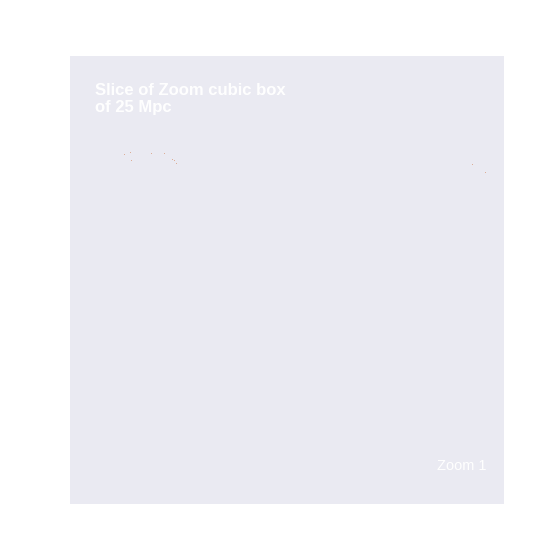

In [9]:
fig, ax = plt.subplots(figsize=[7,7])
ax.set_xlim([pos4[:,0].min(),pos4[:,0].max()])
ax.set_ylim([pos4[:,2].min(),pos4[:,2].max()])
cm4 = plt.cm.get_cmap('summer')
cm3 = plt.cm.get_cmap('summer')
cm2 = plt.cm.get_cmap('summer')
cm1 = plt.cm.get_cmap('summer')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

ax.scatter(pos1[:,0],pos1[:,2],s=0.3,marker='.',color='#C64B00')
ax.scatter(pos2[:,0],pos2[:,2],s=0.003,marker='.',color='#A28400')
ax.scatter(pos3[:,0],pos3[:,2],s=.9,marker='.',color='#BFBA00')
ax.scatter(pos4[:,0],pos4[:,2],s=2.9,marker='.',color='#8CC200')
#ax.scatter(pos5[:,0],pos5[:,2],s=2.9,marker='.',color='#8CC202')
#ax.scatter(posG1[:,0],posG1[:,2],s=.6,c=rhoG1, cmap=cm1,marker='.',linewidths=0,vmin=rhoG1.min(), vmax=rhoG1.max())
#ax.scatter(posG1[:,0],posG1[:,2],s=.6,c='k',linewidths=0,alpha=0.005)

#ax.scatter(posG2[:,0],posG2[:,2],s=1.2,c=rhoG2, cmap=cm2,marker='.',linewidths=0,vmin=rhoG2.min(), vmax=rhoG2.max())
#ax.scatter(posG3[:,0],posG3[:,2],s=9,c=rhoG3, cmap=cm3,marker='.',linewidths=0,vmin=rhoG3.min(), vmax=rhoG3.max())
#ax.scatter(posG4[:,0],posG4[:,2],s=10.02,c=rhoG4, cmap=cm4,marker='o',linewidths=0,vmin=rhoG1.min(), vmax=rhoG1.max())
#ax.scatter(posG4[:,0],posG4[:,2],s=10,c='#08088A',linewidths=0,alpha=0.05)
#ax.scatter(posG3[:,0],posG3[:,2],s=9,c='#0101DF',linewidths=0,alpha=0.03)
fig.text(0.17,0.8, "Slice of Zoom cubic box\nof 25 Mpc", color='w',weight='bold', fontsize=15)
fig.text(0.78,0.16,"Zoom 1",color='w',fontsize=13)
#ax.text(pos3[:,0].mean(),pos3[:,2].min()*.96,"Zoom 2",color='w',fontsize=13)
#ax.text(pos2[:,0].mean()+500,pos2[:,2].min()*.96,"Zoom 3",color='w',fontsize=13)
#ax.text(pos3[:,0].mean(),pos3[:,2].mean(),"Zoom 4",color='w',fontsize=13)

In [ ]:
print "level10 = ",myhalo.dm.mass[conditionDM_1].mean()
print "level9 = ",myhalo.dm.mass[conditionDM_2].mean()
print "level8 = ",myhalo.dm.mass[conditionDM_3].mean()
print "level7 = ",myhalo.dm.mass[conditionDM_4].mean()

<Container object of 19 artists>

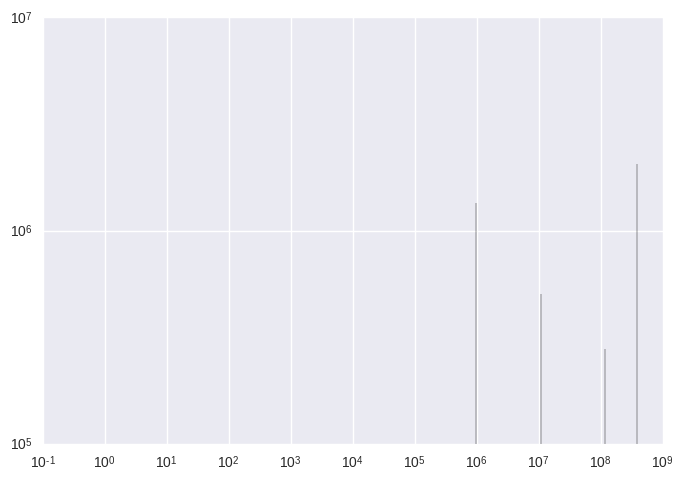

In [16]:
bins = np.logspace(-1,np.log10(myhalo.dm.mass.max()+1000),20)


coco = np.histogram(myhalo.dm.mass,bins=bins)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.bar(coco[1][1:]-(bins[1:]/2),coco[0]) 

In [50]:
print coco[1]

[    1.             1.43844989     2.06913808     2.97635144     4.2813324
     6.15848211     8.8586679     12.74274986    18.32980711    26.36650899
    37.92690191    54.55594781    78.47599704   112.88378917   162.37767392
   233.57214691   335.98182863   483.29302386   695.19279618  1000.        ]


In [105]:
path = "/data/TMP-outputs/output_00041"
myhalo = wkbl.Galaxy_Hound(path,"halo,gas",comov=False,getcen=False)
myhalo.gs.pos3d[:,0] = myhalo.gs.pos3d[:,0]+((myhalo.gs.hsml/2)+np.random.rand(len(myhalo.gs.hsml)))
myhalo.gs.pos3d[:,1] = myhalo.gs.pos3d[:,1]+((myhalo.gs.hsml/2)+np.random.rand(len(myhalo.gs.hsml)))
myhalo.gs.pos3d[:,2] = myhalo.gs.pos3d[:,2]+((myhalo.gs.hsml/2)+np.random.rand(len(myhalo.gs.hsml)))

conditionDM_4 = (myhalo.dm.pos3d[:,1] < 12600)&(myhalo.dm.pos3d[:,1] > 12400)&(myhalo.dm.mass > 1.5e+08)
conditionDM_3 = (myhalo.dm.pos3d[:,1] < 12600)&(myhalo.dm.pos3d[:,1] > 12400)&(myhalo.dm.mass < 1.5e+08)&(myhalo.dm.mass > 0.2e+08)
conditionDM_2 = (myhalo.dm.pos3d[:,1] < 12600)&(myhalo.dm.pos3d[:,1] > 12400)&(myhalo.dm.mass < 0.2e+08)&(myhalo.dm.mass > 0.5e+07)
conditionDM_1 = (myhalo.dm.pos3d[:,1] < 12600)&(myhalo.dm.pos3d[:,1] > 12400)&(myhalo.dm.mass < 0.5e+07)
conditionGS4 = (myhalo.gs.pos3d[:,1] < 12600)&(myhalo.gs.pos3d[:,1] > 12400)&(myhalo.gs.hsml > 1)
conditionGS3 = (myhalo.gs.pos3d[:,1] < 12600)&(myhalo.gs.pos3d[:,1] > 12400)&(myhalo.gs.hsml < 1)&(myhalo.gs.hsml > 0.5)
conditionGS2 = (myhalo.gs.pos3d[:,1] < 12600)&(myhalo.gs.pos3d[:,1] > 12400)&(myhalo.gs.hsml < 0.5)&(myhalo.gs.hsml > 0.3)
conditionGS1 = (myhalo.gs.pos3d[:,1] < 12600)&(myhalo.gs.pos3d[:,1] > 12400)&(myhalo.gs.hsml < 0.3)


pos4 = myhalo.dm.pos3d[conditionDM_4]
pos3 = myhalo.dm.pos3d[conditionDM_3]
pos2 = myhalo.dm.pos3d[conditionDM_2]
pos1 = myhalo.dm.pos3d[conditionDM_1]
posG4 = myhalo.gs.pos3d[conditionGS4]
posG3 = myhalo.gs.pos3d[conditionGS3]
posG2 = myhalo.gs.pos3d[conditionGS2]
posG1 = myhalo.gs.pos3d[conditionGS1]

#posG[:,2] = posG[:,2]+(hsmlG*np.random.rand(len(posG)))



loading Dark matter..
is valid  True
loading Gas..


In [97]:
rhoG4 = myhalo.gs.rho[conditionGS4]
rhoG3 = myhalo.gs.rho[conditionGS3]
rhoG2 = myhalo.gs.rho[conditionGS2]
#rhoG1 = myhalo.gs.rho[conditionGS1]

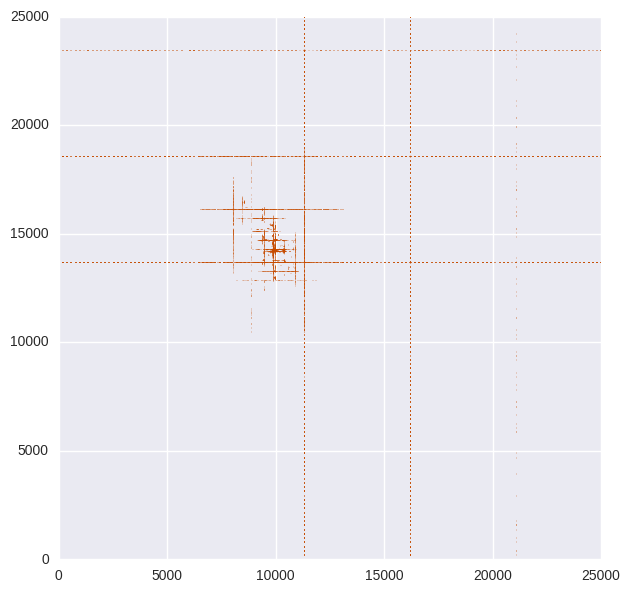

In [109]:
fig, ax = plt.subplots(figsize=[7,7])
ax.set_xlim([0,25000])
ax.set_ylim([0,25000])

ax.scatter(myhalo.gs.pos3d[:,0],myhalo.gs.pos3d[:,2],s=myhalo.gs.hsml/1e8,marker='s',color='#C64B00')

#ax.scatter(pos1[:,0],pos1[:,2],s=0.0003,marker='.',color='#C64B00')
#ax.scatter(pos2[:,0],pos2[:,2],s=0.003,marker='.',color='#C28400')
#ax.scatter(pos3[:,0],pos3[:,2],s=.9,marker='.',color='#BFBA00')
#ax.scatter(pos4[:,0],pos4[:,2],s=2.9,marker='.',color='#8CC200')
#ax.scatter(posG1[:,0],posG1[:,2],s=0.0002,color='#C64B11', alpha=0.5)
#ax.scatter(posG2[:,0],posG2[:,2],s=0.02,color='#C28411')
#ax.scatter(posG3[:,0],posG3[:,2],s=.5,color='#BFBA11')
#ax.scatter(posG4[:,0],posG4[:,2],s=2.02,color='#8CC200')

ValueError: zero-size array to reduction operation minimum which has no identity

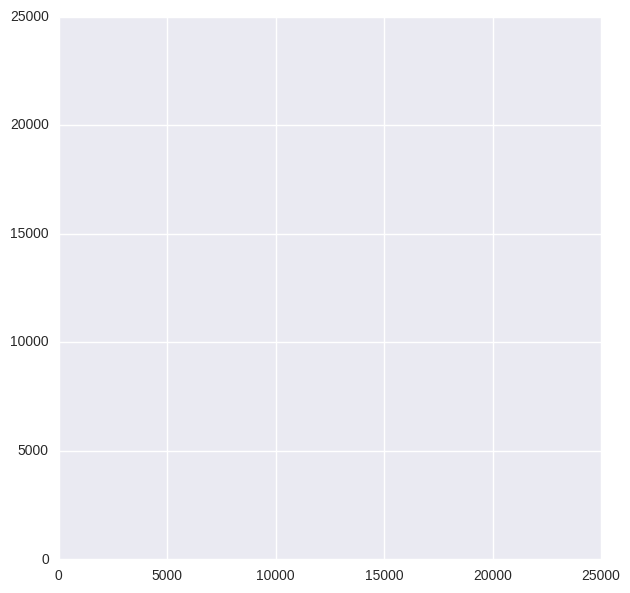

In [101]:
fig, ax = plt.subplots(figsize=[7,7])
ax.set_xlim([0,25000])
ax.set_ylim([0,25000])
cm4 = plt.cm.get_cmap('summer')
cm3 = plt.cm.get_cmap('summer')
cm2 = plt.cm.get_cmap('summer')
cm1 = plt.cm.get_cmap('summer')

#ax.scatter(pos1[:,0],pos1[:,2],s=0.0003,marker='.',color='#C64B00')
#ax.scatter(pos2[:,0],pos2[:,2],s=0.003,marker='.',color='#C28400')
#ax.scatter(pos3[:,0],pos3[:,2],s=.9,marker='.',color='#BFBA00')
#ax.scatter(pos4[:,0],pos4[:,2],s=2.9,marker='.',color='#8CC200')
#ax.scatter(posG1[:,0],posG1[:,2],s=.6,c=rhoG1, cmap=cm1,marker='.',linewidths=0,vmin=rhoG1.min(), vmax=rhoG1.max())
#ax.scatter(posG1[:,0],posG1[:,2],s=.6,c='k',linewidths=0,alpha=0.005)

#ax.scatter(posG2[:,0],posG2[:,2],s=1.2,c=rhoG2, cmap=cm2,marker='.',linewidths=0,vmin=rhoG2.min(), vmax=rhoG2.max())
#ax.scatter(posG3[:,0],posG3[:,2],s=9,c=rhoG3, cmap=cm3,marker='.',linewidths=0,vmin=rhoG3.min(), vmax=rhoG3.max())
ax.scatter(posG4[:,0],posG4[:,2],s=10.02,c=rhoG4, cmap=cm4,marker='o',linewidths=0,vmin=rhoG1.min(), vmax=rhoG1.max())
ax.scatter(posG4[:,0],posG4[:,2],s=10,c='#08088A',linewidths=0,alpha=0.05)
ax.scatter(posG3[:,0],posG3[:,2],s=9,c='#0101DF',linewidths=0,alpha=0.03)

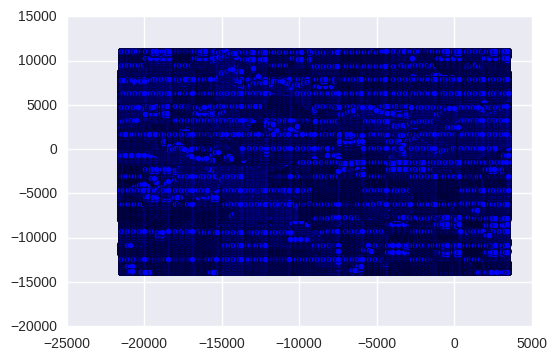

In [23]:
fig, ax =plt.subplots()
ax.scatter(myhalo.dm.pos3d[(myhalo.dm.mass==myhalo.dm.mass.min()),0],myhalo.dm.pos3d[(myhalo.dm.mass==myhalo.dm.mass.min()),1])

In [25]:
myhalo.dm.mass.max()

98366656.0